In [1]:
# define universe
path = './data/'
#f = 'KOSPI200 F201812 181010'
#f = 'K200 F 201903 190219'
f = 'KOSPI200 F201906 190426'

# trading strategy determinants
cd = 'K200F'
n = 20
sigma = 2
thd = 'center'   # center / up
buy = 'out'   # in / out

In [2]:
import pandas as pd
import finterstellar as fs

ld = fs.LoadData()
df = ld.read_intraday_csv(path, f)

prices_df = df.loc[:,['K200F']].copy()
codes = ld.get_codes(prices_df)


trd = fs.IntradayBBTrade()

sample = trd.bollinger_band(prices_df, cd, n, sigma)
book = trd.create_trade_book(sample, cd)
book = trd.tradings(sample, book, thd, cd, buy, short=True)
book = trd.position(book, cd)
fund_rtn = trd.returns(book, cd, display=True)
bm_rtn = trd.benchmark_return(book, cd)
exs_rtn = trd.excess_return(fund_rtn, bm_rtn)

last_date = sample.index[-1]
position_strategy = trd.position_strategy(book, cd, last_date)
trading_strategy = trd.trading_strategy(sample, thd, cd, last_date)

09:36:00 long K200F 280.85
09:42:00 long K200F 280.85  | unwind long K200F 281.1  | return: 1.0009
10:06:00 long K200F 280.6
10:16:00 long K200F 280.6  | unwind long K200F 280.8  | return: 1.0007
10:19:00 short K200F 281.25
10:37:00 short K200F 281.25  | unwind short K200F 281.55  | return: 0.9989
10:41:00 long K200F 281.35
10:49:00 long K200F 281.35  | unwind long K200F 281.65  | return: 1.0011
10:56:00 short K200F 281.95
11:02:00 short K200F 281.95  | unwind short K200F 281.7  | return: 1.0009
11:14:00 short K200F 282.35
11:37:00 short K200F 282.35  | unwind short K200F 282.75  | return: 0.9986
11:42:00 long K200F 282.5
12:09:00 long K200F 282.5  | unwind long K200F 282.3  | return: 0.9993
12:40:00 long K200F 281.85
12:58:00 long K200F 281.85  | unwind long K200F 281.85  | return: 1.0
13:03:00 short K200F 282.0
13:08:00 short K200F 282.0  | unwind short K200F 281.85  | return: 1.0005
13:16:00 short K200F 282.05
13:21:00 short K200F 282.05  | unwind short K200F 281.85  | return: 1.000

In [3]:
v = fs.VisualizeIntraday()

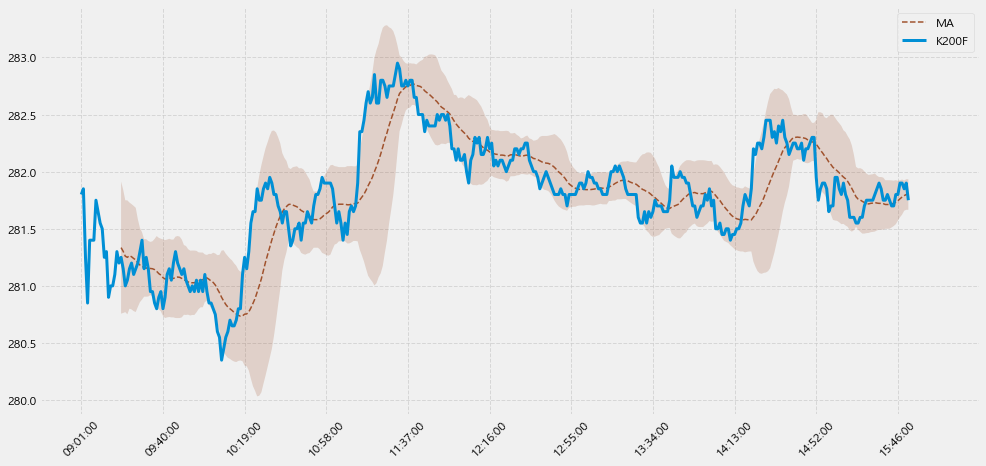

In [4]:
v.bb_trend_view(sample, sigma, cd)

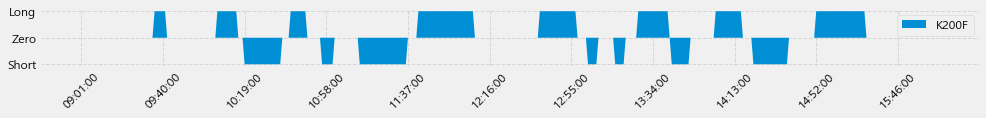

In [5]:
v.position_view(book, cd)